### Task 1: Data Acquisition and Preparation
* Description: Download and load the dataset, then perform initial data cleaning and preprocessing.
Acceptance Criteria:
1. The Kaggle dataset Fish Market has been downloaded.
2. The data is successfully loaded into a pandas DataFrame.
3. Missing values are handled appropriately.
4. The Species categorical feature is encoded.
5. The dataset is split into training and testing sets.

### Task 2: Exploratory Data Analysis and Feature Engineering
* Description: Analyze the dataset to identify relationships and potential issues, then create new features to improve model performance.
Acceptance Criteria:
1. Key features and their relationships with the target variable, Weight, are visualized using scatter plots and heatmaps.
2. Outliers are identified and handled.
3. New features are engineered from existing ones (e.g., creating interaction terms between Length and Width).
4. Relevant plots, such as histograms and box plots, are generated for key features to understand their distribution.

### Task 3: Model Development and Comparison
* Description: Train and evaluate the four specified regression models and compare their performance.
Acceptance Criteria:
1. A Linear Regression model is trained as a baseline.
2. A Ridge Regression model is trained to address multicollinearity and overfitting.
3. A Lasso Regression model is trained for feature selection and regularization.
4. A Polynomial Regression model is trained to capture non-linear relationships.
5. Each model's performance is evaluated using metrics like Root Mean Squared Error (RMSE) and R2 score on the test set.

In [1]:
from sklearn.linear_model import LinearRegression  #used for regression and class
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

### Task 1: Data Acquisition and Preparation


In [2]:
path = "Fish.csv"
df = pd.read_csv(path)
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
df.describe

<bound method NDFrame.describe of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

In [4]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [6]:
# Get all column names as a list
columns_list = df.columns.tolist()
print(columns_list)

['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


In [7]:
(df['Weight'] <= 0).sum()

np.int64(1)

In [8]:
df.query('Weight > 0').reset_index(drop=True)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
153,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
154,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
155,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
156,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [9]:
from sklearn.preprocessing import LabelEncoder

categorical_column = 'Species'
label_encoder = LabelEncoder()
df['Species_encoded'] = label_encoder.fit_transform(df[categorical_column])

print('\nLabel encoding mapping for Species:')
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(mapping)


Label encoding mapping for Species:
{'Bream': np.int64(0), 'Parkki': np.int64(1), 'Perch': np.int64(2), 'Pike': np.int64(3), 'Roach': np.int64(4), 'Smelt': np.int64(5), 'Whitefish': np.int64(6)}


In [10]:
features = df.drop('Weight', axis=1)
target = df.Weight

X_train, X_test, y_train, y_test = train_test_split(
    features, target, 
    test_size=0.2, 
    random_state=42, 
    stratify=features['Species']
)
print("Training shape:", X_train.shape, "Test shape:", X_test.shape)

Training shape: (127, 7) Test shape: (32, 7)


### Task 2: Exploratory Data Analysis and Feature Engineering

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142
Species_encoded,159.0,2.264151,1.704249,0.0000,1.00000,2.0000,3.5000,6.000


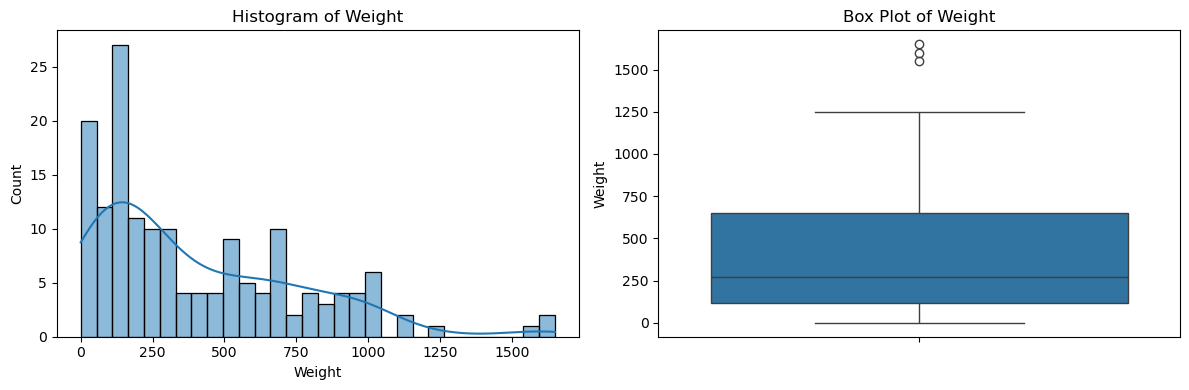

In [19]:
#histogram - boxblot
# Analyze Weight variable distribution
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(1, 2, 1)
sns.histplot(df['Weight'], bins=30, kde=True, ax=ax1)
ax1.set_title('Histogram of Weight')

ax2 = fig.add_subplot(1, 2, 2)
sns.boxplot(data=df, y='Weight', ax=ax2)
ax2.set_title('Box Plot of Weight')

plt.tight_layout()
plt.show()

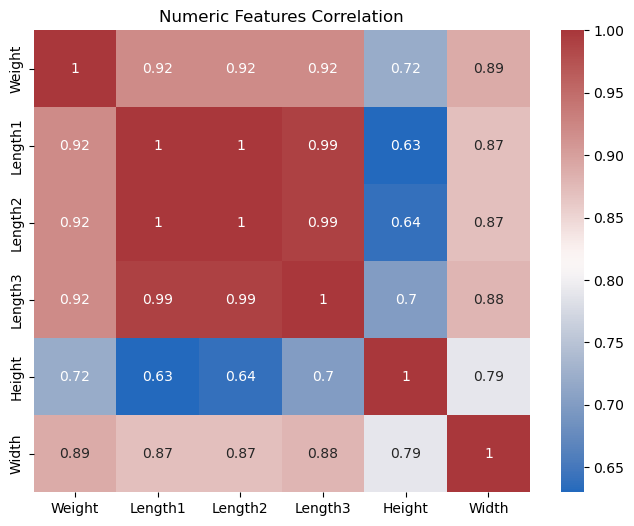

In [16]:
# Correlation matrix
num_cols = ['Weight','Length1','Length2','Length3','Height','Width']

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr().round(2), annot=True, cmap='vlag')
plt.title('Numeric Features Correlation')
plt.show()

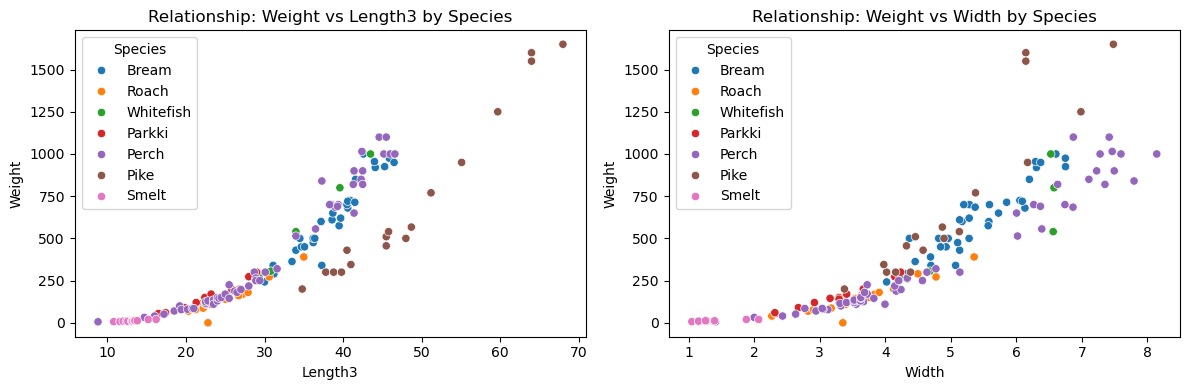

In [17]:
# Create scatter plots to examine relationships
figure, axis = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=df, x='Length3', y='Weight', hue='Species', ax=axis[0])
axis[0].set_title('Relationship: Weight vs Length3 by Species')

sns.scatterplot(data=df, x='Width', y='Weight', hue='Species', ax=axis[1])
axis[1].set_title('Relationship: Weight vs Width by Species')

plt.tight_layout()
plt.show()

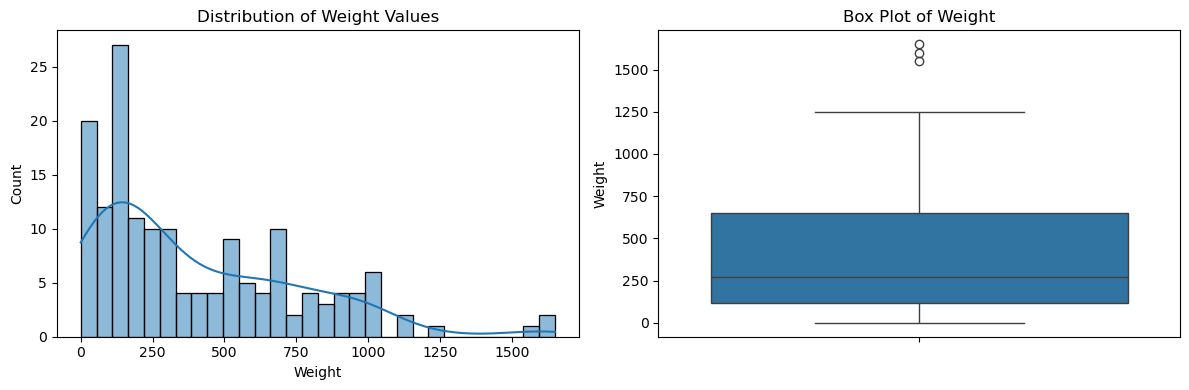

In [20]:
# Outliers are identified and handled.
# Distribution analysis for Weight variable
plt.figure(figsize=(12, 4))

# Histogram subplot
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Weight', bins=30, kde=True)
plt.title('Distribution of Weight Values')

# Boxplot subplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Weight')
plt.title('Box Plot of Weight')

plt.tight_layout()
plt.show()

In [21]:
#3. New features are engineered from existing ones (e.g., creating interaction terms between Length and Width).
# Create features using all available measurements
df['Avg_Length'] = df[['Length1', 'Length2', 'Length3']].mean(axis=1)
df['Length_Std'] = df[['Length1', 'Length2', 'Length3']].std(axis=1)
df['Body_Volume'] = df['Avg_Length'] * df['Width'] * df['Height']
df['Compactness'] = df['Weight'] / (df['Avg_Length'] * df['Width'] * df['Height'])


In [22]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width,Species_encoded,Avg_Length,Length_Std,Body_Volume,Compactness
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0,26.200000,3.469870,1213.332480,0.199451
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0,27.166667,3.677409,1459.770624,0.198661
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0,27.166667,3.646002,1579.127335,0.215309
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0,29.600000,3.637307,1678.868044,0.216217
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0,29.833333,3.818813,1905.976964,0.225606
...,...,...,...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,5,12.366667,0.960902,36.026344,0.338641
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,5,12.533333,0.907377,38.648664,0.346713
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,5,12.966667,0.850490,37.077621,0.329039
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,5,14.233333,1.001665,84.526816,0.233062


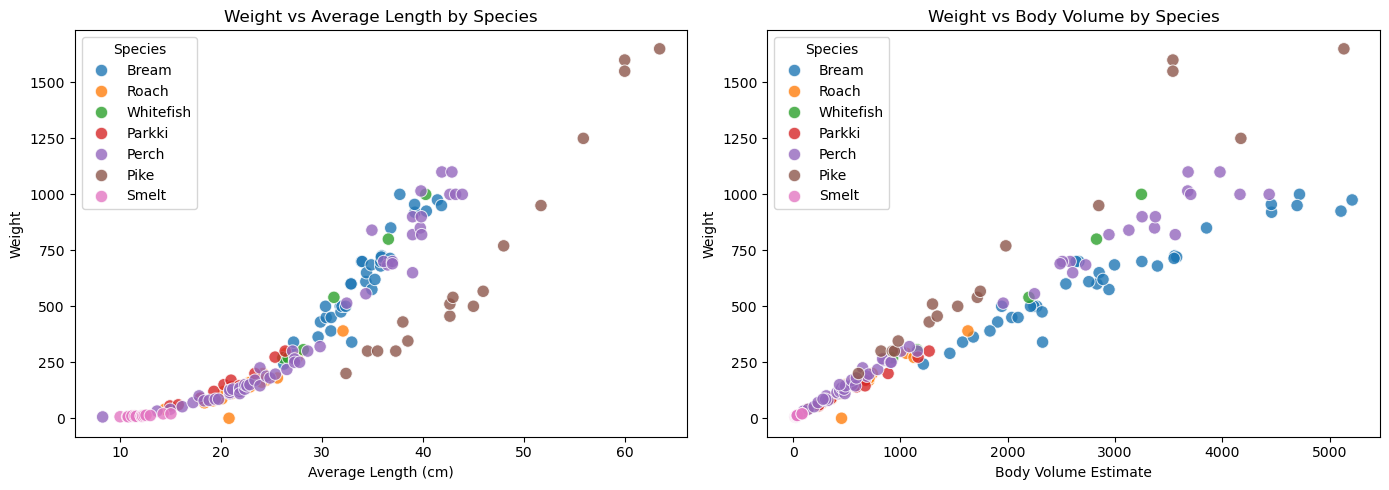

In [23]:
# Create relationship visualization plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Average Length vs Weight
sns.scatterplot(data=df, x='Avg_Length', y='Weight', hue='Species', ax=ax1, s=80, alpha=0.8)
ax1.set_title('Weight vs Average Length by Species')
ax1.set_xlabel('Average Length (cm)')

# Plot 2: Body Volume vs Weight
sns.scatterplot(data=df, x='Body_Volume', y='Weight', hue='Species', ax=ax2, s=80, alpha=0.8)
ax2.set_title('Weight vs Body Volume by Species')
ax2.set_xlabel('Body Volume Estimate')

plt.tight_layout()
plt.show()

### Task 3: Model Development and Comparison


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Define features based on your engineered features
num_features = ['Length1', 'Length2', 'Length3', 'Height', 'Width', 
                'Avg_Length', 'Length_Std', 'Body_Volume', 'Compactness']
cat_features = ['Species']

# Create transformers
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [32]:
def evaluate_model(model, X_test, y_test, description=''):
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    print(f"{description} RMSE: {rmse:.3f}, R2: {r2:.3f}")
    return rmse, r2, preds

# Add your engineered features to the training and test sets
X_train_eng = X_train.copy()
X_test_eng = X_test.copy()

# Calculate your engineered features (using y_train for Compactness calculation)
X_train_eng['Avg_Length'] = X_train_eng[['Length1', 'Length2', 'Length3']].mean(axis=1)
X_train_eng['Length_Std'] = X_train_eng[['Length1', 'Length2', 'Length3']].std(axis=1)
X_train_eng['Body_Volume'] = X_train_eng['Avg_Length'] * X_train_eng['Width'] * X_train_eng['Height']
X_train_eng['Compactness'] = y_train.values / (X_train_eng['Avg_Length'] * X_train_eng['Width'] * X_train_eng['Height'])

X_test_eng['Avg_Length'] = X_test_eng[['Length1', 'Length2', 'Length3']].mean(axis=1)
X_test_eng['Length_Std'] = X_test_eng[['Length1', 'Length2', 'Length3']].std(axis=1)
X_test_eng['Body_Volume'] = X_test_eng['Avg_Length'] * X_test_eng['Width'] * X_test_eng['Height']
X_test_eng['Compactness'] = y_test.values / (X_test_eng['Avg_Length'] * X_test_eng['Width'] * X_test_eng['Height'])

# Linear Regression
lin_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
lin_pipe.fit(X_train_eng, y_train)
lin_rmse, lin_r2, lin_preds = evaluate_model(lin_pipe, X_test_eng, y_test, 'LinearRegression')

# Ridge Regression
ridge_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Ridge())])
param_grid = {'regressor__alpha': [0.01, 0.1, 1, 10, 100]}
ridge_search = GridSearchCV(ridge_pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_search.fit(X_train_eng, y_train)
print('Ridge best params:', ridge_search.best_params_)
ridge_rmse, ridge_r2, ridge_preds = evaluate_model(ridge_search.best_estimator_, X_test_eng, y_test, 'Ridge')

# Lasso Regression
lasso_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Lasso(max_iter=10000))])
param_grid = {'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
lasso_search = GridSearchCV(lasso_pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_search.fit(X_train_eng, y_train)
print('Lasso best params:', lasso_search.best_params_)
lasso_rmse, lasso_r2, lasso_preds = evaluate_model(lasso_search.best_estimator_, X_test_eng, y_test, 'Lasso')

# Polynomial Regression with your features
poly_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler2', StandardScaler()),
    ('reg', Ridge(alpha=1.0))
])
param_grid = {'reg__alpha': [0.01, 0.1, 1, 10]}
poly_search = GridSearchCV(poly_pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
poly_search.fit(X_train_eng, y_train)
print('Polynomial best params:', poly_search.best_params_)
poly_rmse, poly_r2, poly_preds = evaluate_model(poly_search.best_estimator_, X_test_eng, y_test, 'Polynomial(d=2)')


LinearRegression RMSE: 62.910, R2: 0.979
Ridge best params: {'regressor__alpha': 0.01}
Ridge RMSE: 62.360, R2: 0.979


C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.580e+04, tolerance: 1.127e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.133e+05, tolerance: 1.121e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.180e+05, toler

Lasso best params: {'regressor__alpha': 0.1}
Lasso RMSE: 63.045, R2: 0.979
Polynomial best params: {'reg__alpha': 0.01}
Polynomial(d=2) RMSE: 3.027, R2: 1.000


In [33]:
# Results summary
results = pd.DataFrame({
    'model': ['LinearRegression', 'Ridge', 'Lasso', 'Polynomial(d=2)'],
    'RMSE': [lin_rmse, ridge_rmse, lasso_rmse, poly_rmse],
    'R2': [lin_r2, ridge_r2, lasso_r2, poly_r2]
})
results = results.sort_values('RMSE')
print("\nModel Performance Summary:")
print(results)

best_model_idx = results['RMSE'].idxmin()
best_model_name = results.loc[best_model_idx, 'model']
print(f'\nBest model: {best_model_name}')


Model Performance Summary:
              model       RMSE        R2
3   Polynomial(d=2)   3.027188  0.999951
1             Ridge  62.360237  0.979367
0  LinearRegression  62.909591  0.979002
2             Lasso  63.045071  0.978911

Best model: Polynomial(d=2)


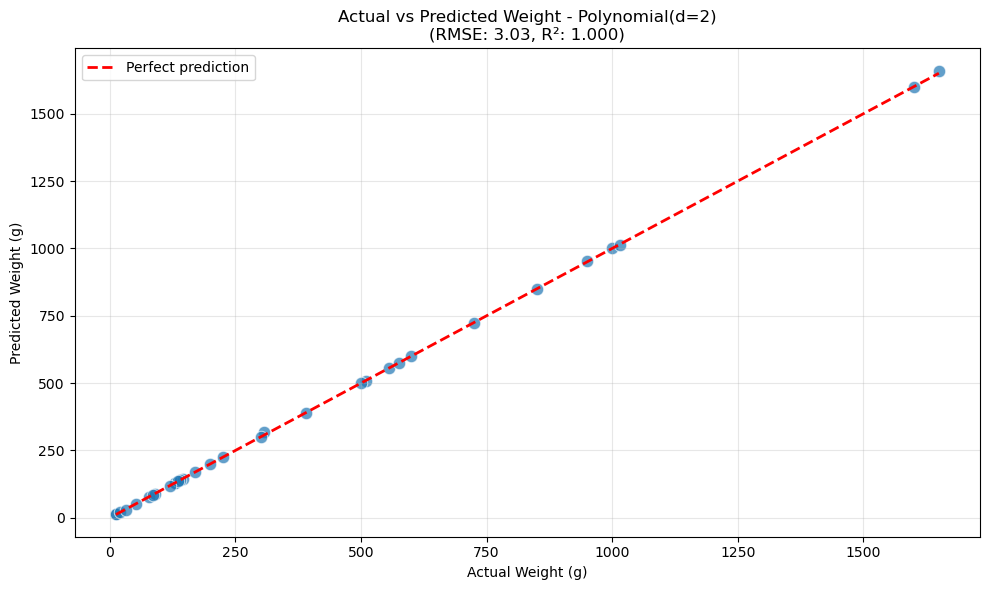

In [34]:
# Plot actual vs predicted for the best model
plt.figure(figsize=(10, 6))
preds = {'LinearRegression': lin_preds, 'Ridge': ridge_preds, 
         'Lasso': lasso_preds, 'Polynomial(d=2)': poly_preds}[best_model_name]

sns.scatterplot(x=y_test, y=preds, alpha=0.7, s=80)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect prediction')
plt.xlabel('Actual Weight (g)')
plt.ylabel('Predicted Weight (g)')
plt.title(f'Actual vs Predicted Weight - {best_model_name}\n(RMSE: {results.loc[best_model_idx, "RMSE"]:.2f}, R²: {results.loc[best_model_idx, "R2"]:.3f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

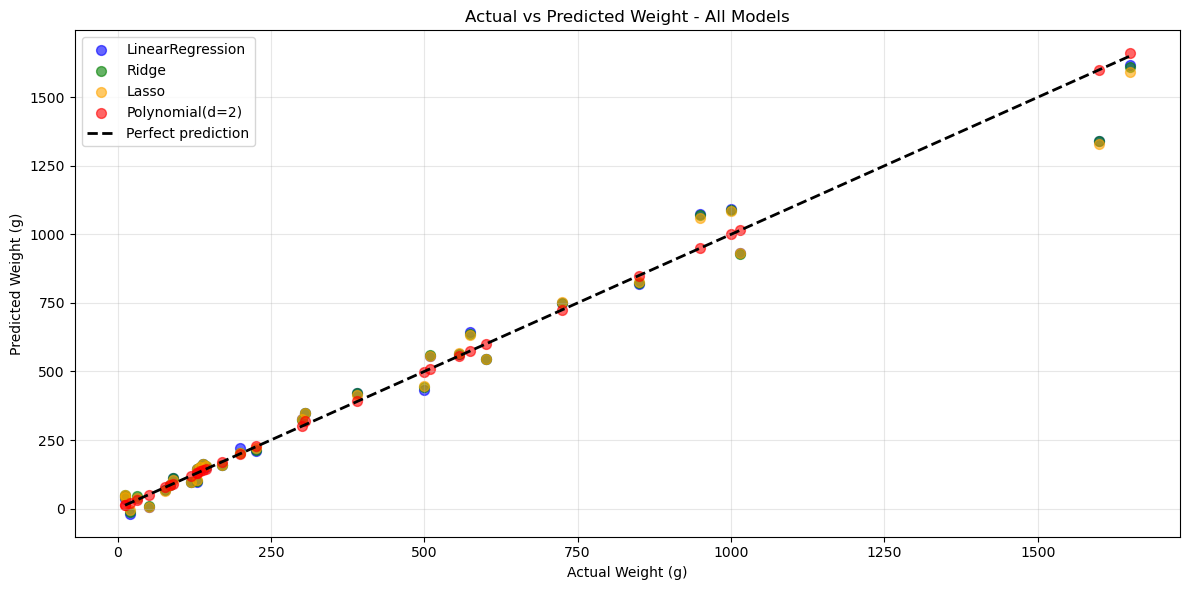

In [35]:
# Additional plot: Compare all models
plt.figure(figsize=(12, 6))
models = ['LinearRegression', 'Ridge', 'Lasso', 'Polynomial(d=2)']
predictions = [lin_preds, ridge_preds, lasso_preds, poly_preds]
colors = ['blue', 'green', 'orange', 'red']

for i, (model, pred, color) in enumerate(zip(models, predictions, colors)):
    plt.scatter(y_test, pred, alpha=0.6, s=50, label=model, color=color)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect prediction')
plt.xlabel('Actual Weight (g)')
plt.ylabel('Predicted Weight (g)')
plt.title('Actual vs Predicted Weight - All Models')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


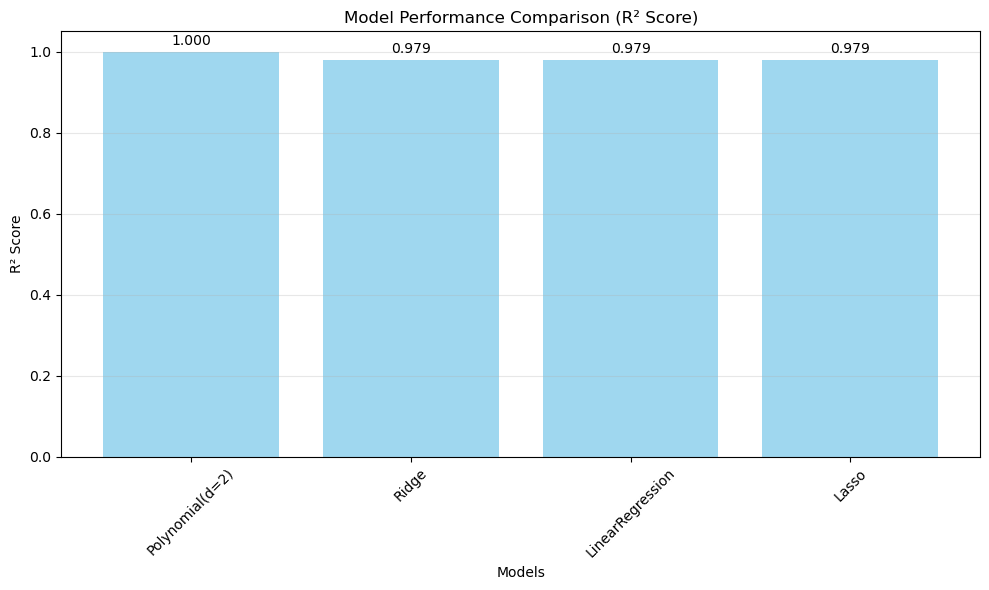

In [36]:
# Plot model performance comparison
plt.figure(figsize=(10, 6))
x_pos = np.arange(len(results))
plt.bar(x_pos, results['R2'], alpha=0.8, color='skyblue')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Model Performance Comparison (R² Score)')
plt.xticks(x_pos, results['model'], rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Add R² values on top of bars
for i, v in enumerate(results['R2']):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()